In [1]:
#importing all the essential libraries to perform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the Binance coin historical data into python
BIN = pd.read_csv(r"C:\Users\Lathapriya\OneDrive\Documents\Business project\Data\coin_BinanceCoin.csv")

In [3]:
BIN.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In [4]:
BIN.shape

(1442, 10)

In [5]:
#Checking for any null values in the data
BIN.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [6]:
BIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1442 non-null   int64  
 1   Name       1442 non-null   object 
 2   Symbol     1442 non-null   object 
 3   Date       1442 non-null   object 
 4   High       1442 non-null   float64
 5   Low        1442 non-null   float64
 6   Open       1442 non-null   float64
 7   Close      1442 non-null   float64
 8   Volume     1442 non-null   float64
 9   Marketcap  1442 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 112.8+ KB


array([[<AxesSubplot:title={'center':'SNo'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Marketcap'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

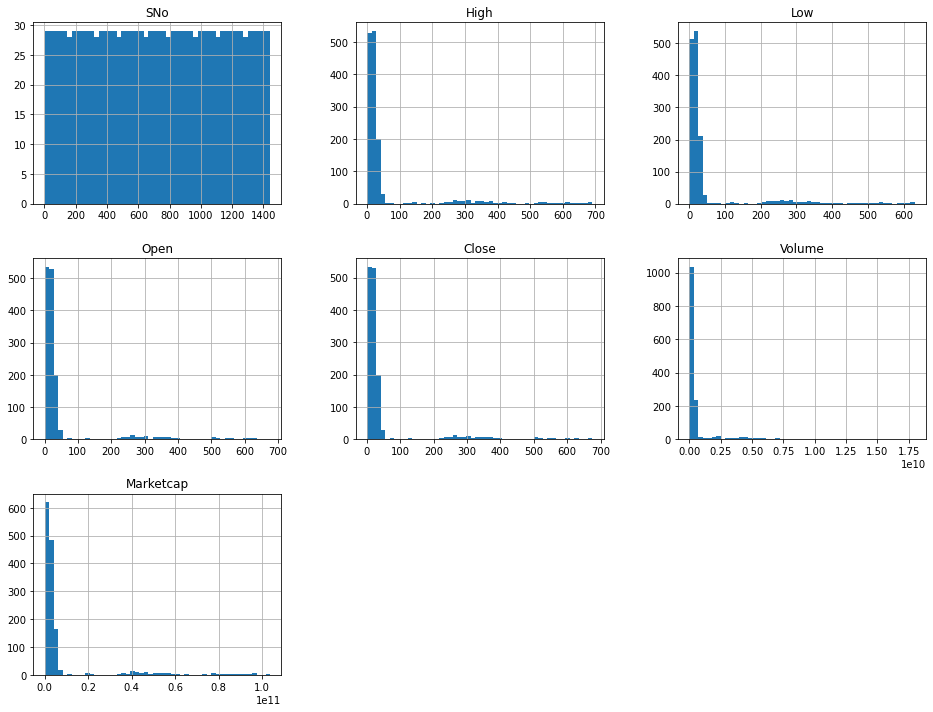

In [7]:
BIN.hist(bins=50, figsize=(16,12))

In [8]:
#Removing the coloum that is not required for the analysis
del BIN['SNo']
del BIN['Name']
del BIN['Symbol']
del BIN['Volume']
del BIN['Marketcap']

In [9]:
BIN.head()

,Date,High,Low,Open,Close
0,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138
1,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737
2,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067
3,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811
4,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414


In [10]:
#change the date time to date column for the entire dataset
BIN['Date'] = pd.to_datetime(BIN['Date']).dt.date

In [11]:
#set the date coloum as the index column
BIN.set_index("Date", inplace=True)

In [12]:
BIN.describe()

,High,Low,Open,Close
count,1442.000000,1442.000000,1442.000000,1442.000000
mean,54.764100,49.165813,52.028231,52.250308
std,121.675817,108.118454,115.170060,115.390917
min,0.101211,0.096109,0.099721,0.099867
25%,10.390750,9.677340,10.037860,10.068350
50%,16.592114,15.727250,16.210328,16.210569
75%,28.240910,26.963038,27.669888,27.691107
max,690.931965,631.465298,676.315905,675.684077


array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

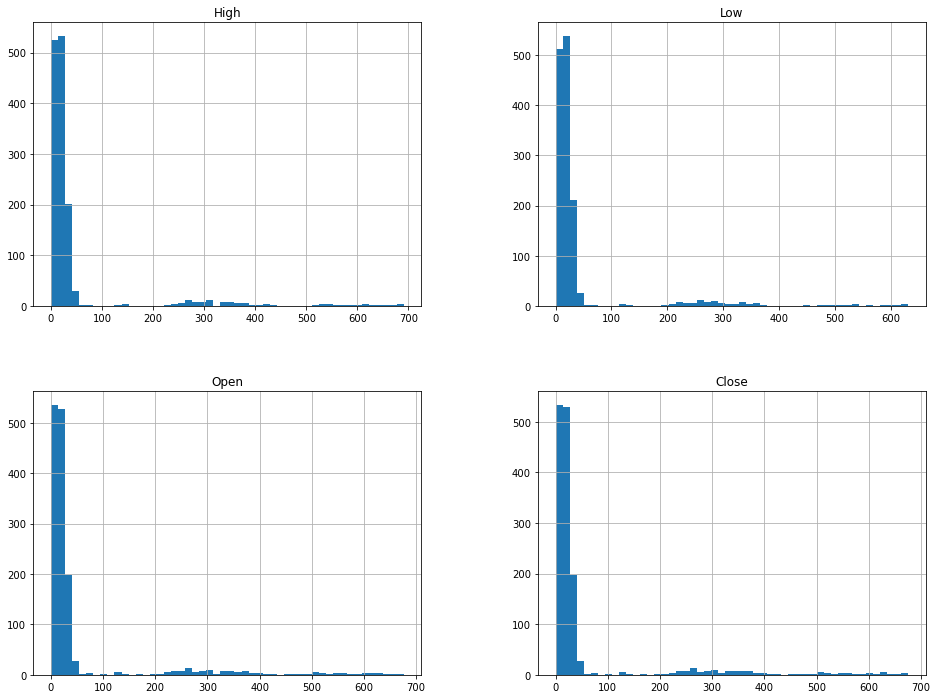

In [13]:
BIN.hist(bins=50, figsize=(16,12))

(array([17348., 17532., 17713., 17897., 18078., 18262., 18444., 18628.,
        18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

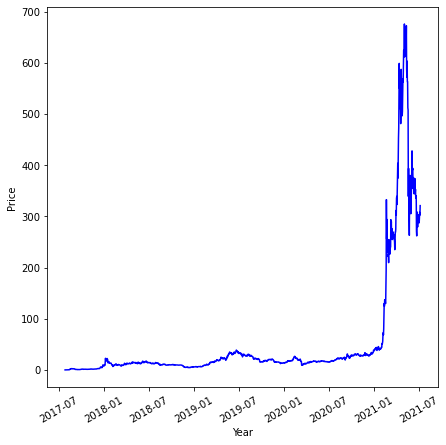

In [14]:
plt.figure(figsize=(7, 7))
BIN['Close'].plot(color='b')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=30)

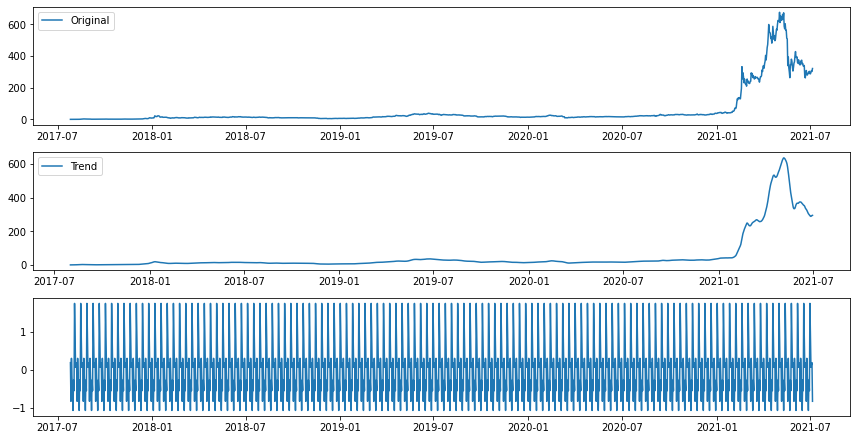

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

#  the number of observations in a cycle is specified
decompose = seasonal_decompose(BIN['Close'], freq=12)

trend_obs = decompose.trend
seasonal_obs = decompose.seasonal

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(BIN['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_obs, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_obs,label='Seasonality')
plt.tight_layout()

In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

for a in ["Open", "High", "Low","Close"]:
    adf_pval = adfuller(BIN[a])[1]
    print(a)
    print(f"ADF test, p-value: {adf_pval}")
    kpss_stat, kpss_pval, lags, crit_vals = kpss(BIN['Close'])
    print(f"KPSS test, p-value: {kpss_pval}")

Open
ADF test, p-value: 0.6131653564541981
KPSS test, p-value: 0.01
High
ADF test, p-value: 0.6994169152644855
KPSS test, p-value: 0.01
Low
ADF test, p-value: 0.7316470379984292
KPSS test, p-value: 0.01
Close
ADF test, p-value: 0.6767129852209186
KPSS test, p-value: 0.01


In [17]:
#the values are not stationary first order of differencing the data
BIN2= BIN.diff()

In [18]:
BIN2.head()

,High,Low,Open,Close
Date,,,,
2017-07-26,NaN,NaN,NaN,NaN
2017-07-27,-0.000534,0.001622,-0.000785,0.002599
2017-07-28,0.000540,0.000585,0.002524,-0.003670
2017-07-29,0.002245,-0.000365,-0.002850,0.003744
2017-07-30,-0.003126,0.002054,0.003153,-0.001397


In [19]:
BIN2.dropna(inplace=True)

In [20]:
BIN2.describe()

,High,Low,Open,Close
count,1441.000000,1441.000000,1441.000000,1441.000000
mean,0.223048,0.209644,0.209639,0.222644
std,8.765316,9.497002,10.952786,10.908756
min,-91.422310,-213.524863,-173.305997,-168.996819
25%,-0.304635,-0.231900,-0.348830,-0.333699
50%,-0.003126,0.068849,0.016393,0.012240
75%,0.341418,0.430800,0.455106,0.455942
max,143.423963,61.758992,136.930586,136.683393


(array([17348., 17532., 17713., 17897., 18078., 18262., 18444., 18628.,
        18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

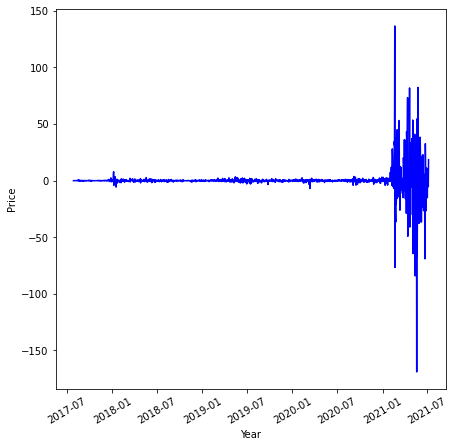

In [21]:
plt.figure(figsize=(7, 7))
BIN2['Close'].plot(color='b')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=30)

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Close'}>]], dtype=object)

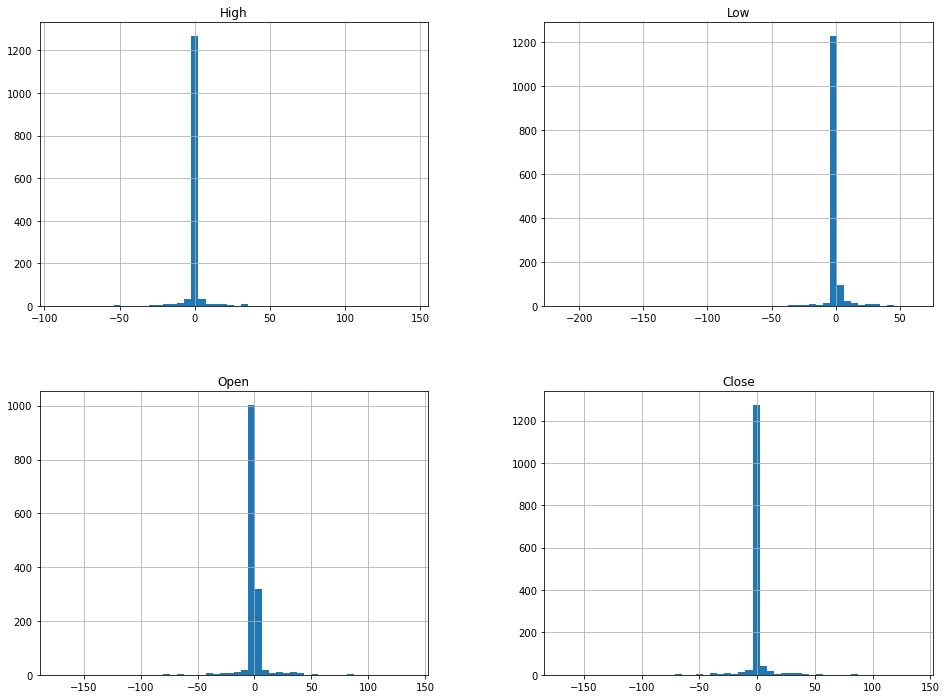

In [22]:
BIN2.hist(bins=50, figsize=(16,12))

In [23]:
#Splitiing the data into train and test that is of 70 and 30
from sklearn.model_selection import train_test_split

train, test = train_test_split(BIN2, test_size=0.3, random_state=7, shuffle=False)
print(f"{train.shape[0]} train and {test.shape[0]} test instances")

1008 train and 433 test instances


In [24]:
train.index.min(), train.index.max()

(datetime.date(2017, 7, 27), datetime.date(2020, 4, 29))

In [25]:
test.index.min(), test.index.max()

(datetime.date(2020, 4, 30), datetime.date(2021, 7, 6))

In [26]:
train.head()

,High,Low,Open,Close
Date,,,,
2017-07-27,-0.000534,0.001622,-0.000785,0.002599
2017-07-28,0.000540,0.000585,0.002524,-0.003670
2017-07-29,0.002245,-0.000365,-0.002850,0.003744
2017-07-30,-0.003126,0.002054,0.003153,-0.001397
2017-07-31,0.000211,-0.001562,-0.001107,-0.002164


In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train['Close'], nlags=20)
lag_pacf = pacf(train['Close'], nlags=20, method='ols')

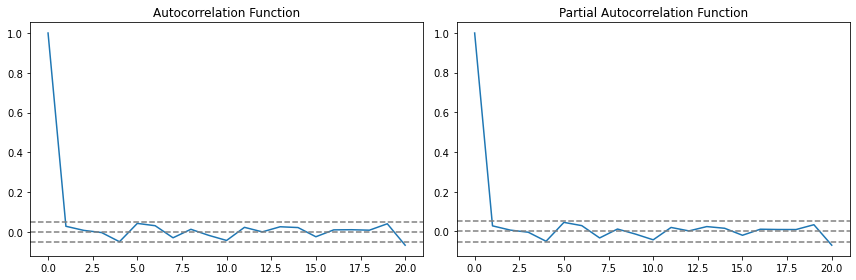

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(BIN2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(BIN2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(BIN2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(BIN2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
#importing the arima model from the stats library and defining the difference to be used later in the model
from statsmodels.tsa.arima_model import ARIMA
def differ(BIN2, interval=1):
    differenced = list()
    for t in range(interval, len(BIN2)):
        value = BIN2[t] - BIN2[t-interval]
        differenced.append(value)
    return np.array(differenced)

def differ_inverse(history, yhat, interval=1):
    return yhat + history[-interval]

In [30]:
Closing_price = BIN2.Close
X = Closing_price.values
datesX = Closing_price.index
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
no_of_days = 365
Dates = datesX[size:len(X)]

# Predicting with the ARIMA Model (1,0,1)
differenced_data = differ(train, no_of_days)
arima_model = ARIMA(differenced_data, order=(1, 0, 1))
arima_model_fit = arima_model.fit()
index_start = len(differenced_data)
index_end = index_start + 432
forecast = arima_model_fit.predict(start=index_start, end=index_end)

history = [x for x in train]
day = 1
results_predicted = list()

#Printing the predicted value 
for yhat in forecast:
    inverted = differ_inverse(history, yhat, no_of_days)
    print("Predicted for the Day %d: %f" % (day, inverted))
    history.append(inverted)
    results_predicted.append(inverted)
    day += 1

Predicted for the Day 1: -0.157579
Predicted for the Day 2: 1.632967
Predicted for the Day 3: 0.141283
Predicted for the Day 4: -0.886789
Predicted for the Day 5: 0.110316
Predicted for the Day 6: -0.839538
Predicted for the Day 7: -1.369389
Predicted for the Day 8: -0.138796
Predicted for the Day 9: -1.951794
Predicted for the Day 10: 0.742187
Predicted for the Day 11: 1.423723
Predicted for the Day 12: -0.246779
Predicted for the Day 13: 2.953085
Predicted for the Day 14: -0.212261
Predicted for the Day 15: 3.240866
Predicted for the Day 16: -0.596790
Predicted for the Day 17: -0.670890
Predicted for the Day 18: 2.686563
Predicted for the Day 19: 0.988394
Predicted for the Day 20: -0.135114
Predicted for the Day 21: 2.674331
Predicted for the Day 22: -0.612990
Predicted for the Day 23: 0.066036
Predicted for the Day 24: 2.298000
Predicted for the Day 25: 1.184050
Predicted for the Day 26: -0.975907
Predicted for the Day 27: -0.451829
Predicted for the Day 28: -0.347393
Predicted for 

In [31]:
print(arima_model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0277      0.046     -0.602      0.547      -0.118       0.062
ar.L1.y        0.5038      0.408      1.234      0.217      -0.297       1.304
ma.L1.y       -0.4668      0.417     -1.119      0.263      -1.284       0.351


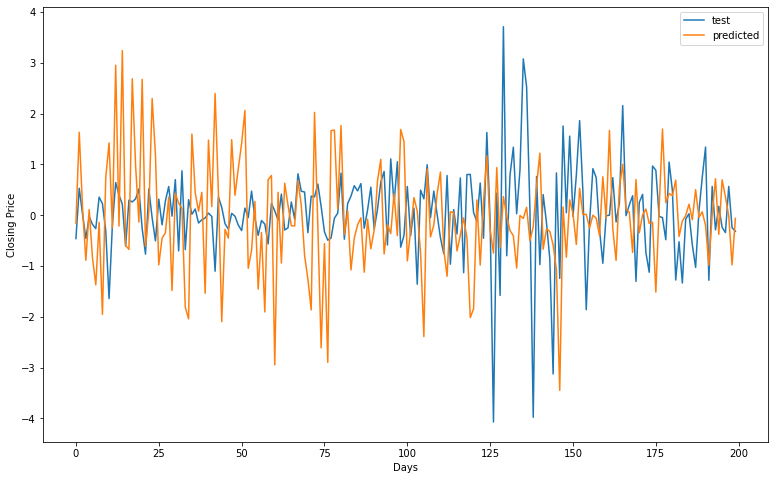

In [32]:
pd.DataFrame({"test": test[:200], "predicted": results_predicted[:200]}).plot(figsize=(13,8))
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.show()

In [33]:
#finding all the statistical perdormance 
from sklearn import metrics
MSE= metrics.mean_squared_error(test, results_predicted)
MAE= metrics.mean_absolute_error(test, results_predicted)
RMSE= np.sqrt(metrics.mean_squared_error(test, results_predicted))
MAPE= metrics.mean_absolute_percentage_error(test, results_predicted)
print (MSE)
print (MAE)
print (RMSE)
print (MAPE)

396.5500669962603
8.84338362365265
19.913564899240424
11.510034269131403
